# Premier League Results Cleaning & Analysis

This notebook walks through task that range, from data cleaning to analysis, using the **`premier‑league‑data.csv`** file.

In [18]:
import pandas as pd

df = pd.read_csv('premier-league-data.csv')
df.columns = (
    df.columns
      .str.encode("utf-8")         
      .str.decode("utf-8-sig")     
      .str.replace('"', '')      
)
df.head()
print(df.columns.tolist())

['home_team', 'away_team', 'home_goals', 'away_goals', 'result', 'season']


## Data Cleaning

### **1**. Replace invalid values from the `season` column

In [ ]:
# TODO: replace the '?' season markers

In [22]:
invalid_vals = df['season'] == '?'
df.loc[invalid_vals, 'season'] = 'Unknown season'
df.head()

,home_team,away_team,home_goals,away_goals,result,season
0,Sheffield United,Liverpool,1,1,D,2006-2007
1,Arsenal,Aston Villa,1,1,D,2006-2007
2,Everton,Watford,2,1,H,Unknown season
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007


### 2. Identify invalid values in goals scored

In [ ]:
# TODO: count negatives or '?' in goals columns

<Axes: >

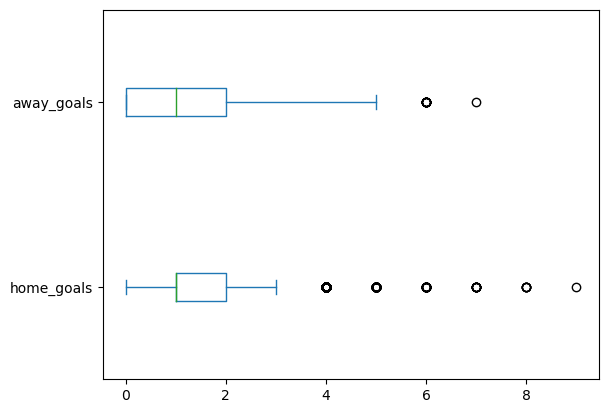

In [47]:
df[['home_goals','away_goals']].plot(kind='box', vert=False)

In [28]:
df['home_goals'].value_counts()

home_goals
 1    1436
 2    1119
 0    1050
 3     568
 4     232
 5      75
 6      30
-2      21
 7      10
-1       9
 8       5
-4       4
 9       1
Name: count, dtype: int64

In [31]:
df['away_goals'].value_counts()

away_goals
 0    1558
 1    1548
 2     862
 3     380
 4     127
 5      32
-2      28
 6      13
-1       6
-4       5
 7       1
Name: count, dtype: int64

In [29]:
invalid_home = df['home_goals']<0
invalid_away = df['away_goals']<0

In [39]:
invalid_hg_count = df.loc[invalid_home,'home_goals'].count()
invalid_ag_count = df.loc[invalid_away,'away_goals'].count()
print(f" Total invalid home goals goals are {invalid_hg_count} and total invalid away goals are {invalid_ag_count}.")

 Total invalid home goals goals are 34 and total invalid away goals are 39.


### 3. Replace invalid goals for 0

In [42]:
df.loc[invalid_home,'home_goals'] = 0
df.loc[invalid_away,'away_goals'] = 0

In [44]:
df['home_goals'].value_counts()

home_goals
1    1436
2    1119
0    1084
3     568
4     232
5      75
6      30
7      10
8       5
9       1
Name: count, dtype: int64

In [43]:
df['away_goals'].value_counts()

away_goals
0    1597
1    1548
2     862
3     380
4     127
5      32
6      13
7       1
Name: count, dtype: int64

### 4. Identify and clean invalid results in the `result` column

In [ ]:
# result should be H/A/D, fix '?'

In [50]:
invalid_result = ~df['result'].isin(['H','A','D'])

# Home team won
df.loc[invalid_result & (df['home_goals'] > df['away_goals']),
       'result'] = 'H'

# Away team won
df.loc[invalid_result & (df['home_goals'] < df['away_goals']),
       'result'] = 'A'

# Draw
df.loc[invalid_result & (df['home_goals'] == df['away_goals']),
       'result'] = 'D'

## Analysis

### 5. What's the average number of goals per match?

In [53]:
avg_goal = (df['home_goals'] + df['away_goals']).mean()
avg_goal

2.6633771929824563

### 6. Create a new column `total_goals`

In [58]:
df['total_goals'] = df['home_goals'] + df['away_goals']
df.head()

,home_team,away_team,home_goals,away_goals,result,season,total_goals
0,Sheffield United,Liverpool,1,1,D,2006-2007,2
1,Arsenal,Aston Villa,1,1,D,2006-2007,2
2,Everton,Watford,2,1,H,Unknown season,3
3,Newcastle United,Wigan Athletic,2,1,H,2006-2007,3
4,Portsmouth,Blackburn Rovers,3,0,H,2006-2007,3


### 7. Calculate average goals per season

In [61]:
goals_per_season = df.groupby('season')['total_goals'].mean().sort_index()
goals_per_season

season
2006-2007         2.429799
2007-2008         2.618421
2008-2009         2.463158
2009-2010         2.747368
2010-2011         2.797368
2011-2012         2.763158
2012-2013         2.773684
2013-2014         2.718421
2014-2015         2.500000
2015-2016         2.676316
2016-2017         2.794737
2017-2018         2.678947
Unknown season    2.419355
Name: total_goals, dtype: float64

### 8. What's the biggest goal difference in a match?

In [69]:
max_diff = (df['home_goals'] - df['away_goals']).abs().max()
max_diff

8

### 9. What's the team with most away wins?

In [71]:
away_wins = df[df['result'] == 'A']['away_team'].value_counts().idxmax()
away_wins

'Chelsea'

### 10. What's the team with the most goals scored at home?

In [76]:
home_goals_team = df.groupby('home_team')['home_goals'].sum().idxmax()
home_goals_team

'Manchester City'

### 11. What's the team that received the least amount of goals while playing at home?

In [78]:
received_ratio = df.groupby('home_team')['away_goals'].sum()/df.groupby('home_team')['home_team'].count()
least_received = received_ratio.idxmin()
least_received

'Manchester United'

### 12. What's the team with most goals scored playing as a visitor (away from home)?

In [80]:
away_goals_team = df.groupby('away_team')['away_goals'].sum().idxmax()
away_goals_team

'Arsenal'

In [82]:
df['season'].value_counts

0       False
1       False
2       False
3       False
4       False
        ...  
4555    False
4556    False
4557    False
4558    False
4559    False
Name: season, Length: 4560, dtype: bool